In [1]:
import pandas as pd

In [2]:
data_latih = pd.read_csv('../output/tf-idf/dataset_merge_clean_extract_fix.csv', encoding='utf-8')
data_latih

,aa,aad,aal,aamiin,aamiinyra,aatau,aau,aaya,abad,abadi,...,zebra,zee,zeejkt,zero,zombi,zombie,zoo,zoom,zumar,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### SMOTE

In [3]:
# SMOTE
# !pip install imblearn

from imblearn.over_sampling import SMOTE

In [4]:
X = data_latih.drop('sentimen', axis=1)
y = data_latih['sentimen']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [5]:
X_res_df = pd.DataFrame(X_res)
X_res_df['sentimen'] = y_res
X_res_df

C:\Users\Dell 7300\AppData\Local\Temp\ipykernel_16664\3262695030.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_res_df['sentimen'] = y_res


,aa,aad,aal,aamiin,aamiinyra,aatau,aau,aaya,abad,abadi,...,zee,zeejkt,zero,zombi,zombie,zoo,zoom,zumar,zumba,sentimen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positif
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negatif
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positif
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negatif
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negatif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positif
7166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positif
7167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positif
7168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positif


### Visualisasi

In [6]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import numpy as np
from collections import Counter

Counter({'negatif': 2390, 'positif': 1459, 'netral': 435})


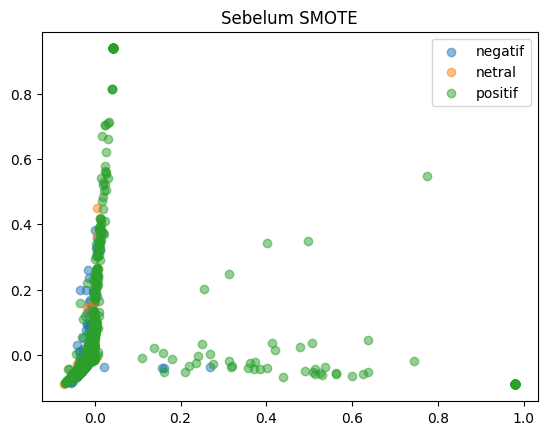

Counter({'positif': 2390, 'negatif': 2390, 'netral': 2390})


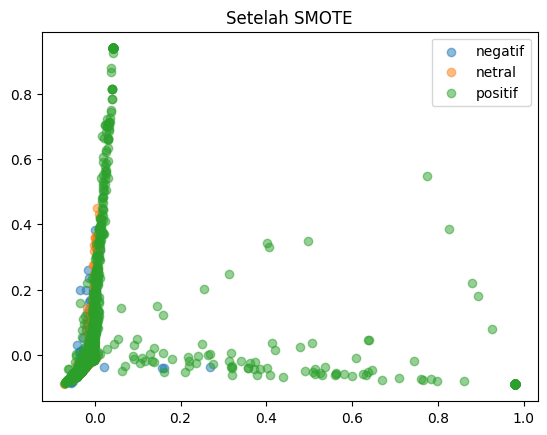

In [7]:
# Mengurangi dimensi dengan PCA agar bisa divisualisasikan dalam 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_res_pca = pca.transform(X_res)

# Ubah label menjadi angka
le = LabelEncoder()
y_num = le.fit_transform(y)
y_res_num = le.transform(y_res)

# Plot data asli
print(Counter(y))
for label in np.unique(y_num):
    label_str = le.inverse_transform([label])[0]
    plt.scatter(X_pca[y_num == label, 0], X_pca[y_num == label, 1], label=label_str, alpha=0.5)
plt.title('Sebelum SMOTE')
plt.legend()
plt.show()

# Plot data setelah SMOTE
print(Counter(y_res))
for label in np.unique(y_res_num):
    label_str = le.inverse_transform([label])[0]
    plt.scatter(X_res_pca[y_res_num == label, 0], X_res_pca[y_res_num == label, 1], label=label_str, alpha=0.5)
plt.title('Setelah SMOTE')
plt.legend()
plt.show()


In [8]:
print(type(X_res))
print(type(y_res))
print(X_res.shape)
print(y_res.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(7170, 8752)
(7170,)


### KNN Model

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
model = KNeighborsClassifier(n_neighbors=5)

#### K-Fold Cross Validation

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

In [61]:
conf_matrices = []
class_reports = []

precisions = []
recalls = []
f1_scores = []
accuracies = []

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

Fold 1:

Confusion Matrix:
 [[199  13  32]
 [ 23  14   9]
 [ 46   6  87]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.74      0.82      0.78       244
      netral       0.42      0.30      0.35        46
     positif       0.68      0.63      0.65       139

    accuracy                           0.70       429
   macro avg       0.62      0.58      0.59       429
weighted avg       0.69      0.70      0.69       429

Accuracy:  0.6993006993006993

----------------------



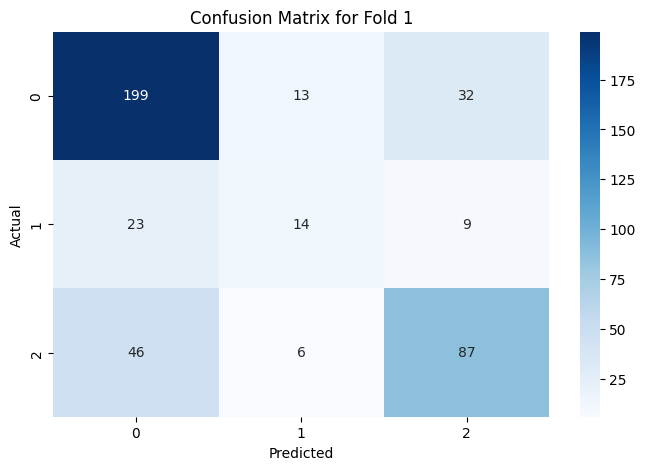

Fold 2:

Confusion Matrix:
 [[200  13  28]
 [ 25   6  17]
 [ 38   5  97]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.76      0.83      0.79       241
      netral       0.25      0.12      0.17        48
     positif       0.68      0.69      0.69       140

    accuracy                           0.71       429
   macro avg       0.56      0.55      0.55       429
weighted avg       0.68      0.71      0.69       429

Accuracy:  0.7062937062937062

----------------------



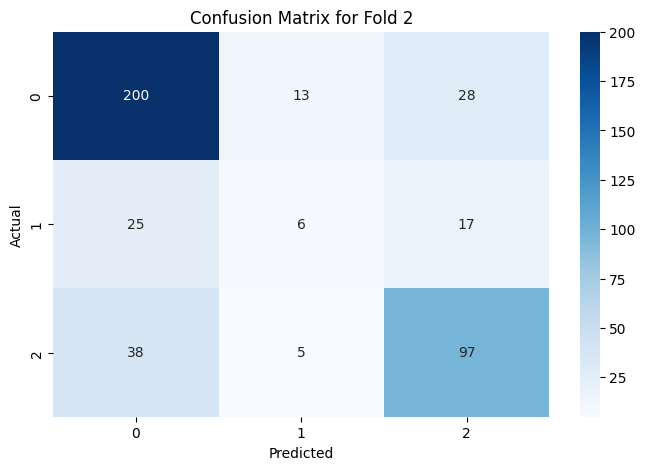

Fold 3:

Confusion Matrix:
 [[209   4  24]
 [ 21   9   8]
 [ 40  10 104]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.77      0.88      0.82       237
      netral       0.39      0.24      0.30        38
     positif       0.76      0.68      0.72       154

    accuracy                           0.75       429
   macro avg       0.64      0.60      0.61       429
weighted avg       0.74      0.75      0.74       429

Accuracy:  0.7505827505827506

----------------------



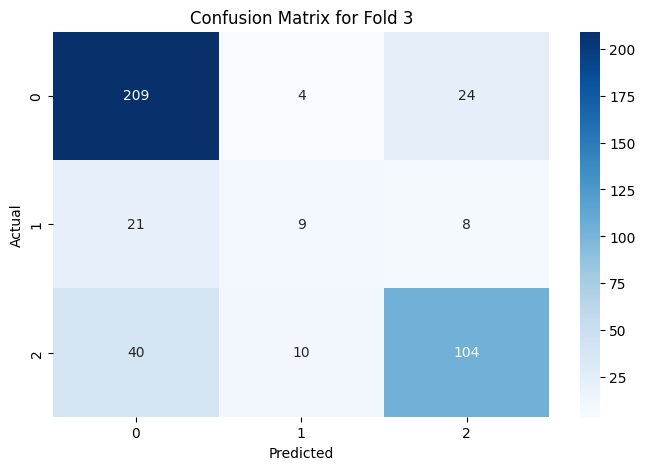

Fold 4:

Confusion Matrix:
 [[192   9  34]
 [ 31   7  16]
 [ 36   9  95]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.74      0.82      0.78       235
      netral       0.28      0.13      0.18        54
     positif       0.66      0.68      0.67       140

    accuracy                           0.69       429
   macro avg       0.56      0.54      0.54       429
weighted avg       0.66      0.69      0.67       429

Accuracy:  0.6853146853146853

----------------------



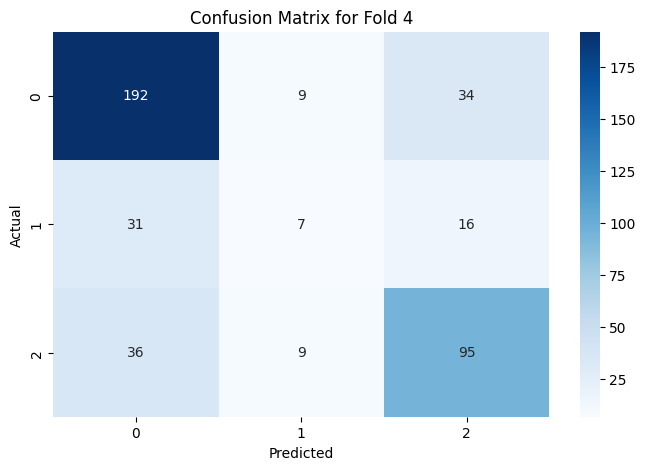

Fold 5:

Confusion Matrix:
 [[214  14  28]
 [ 20  15   9]
 [ 33  10  85]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.80      0.84      0.82       256
      netral       0.38      0.34      0.36        44
     positif       0.70      0.66      0.68       128

    accuracy                           0.73       428
   macro avg       0.63      0.61      0.62       428
weighted avg       0.73      0.73      0.73       428

Accuracy:  0.7336448598130841

----------------------



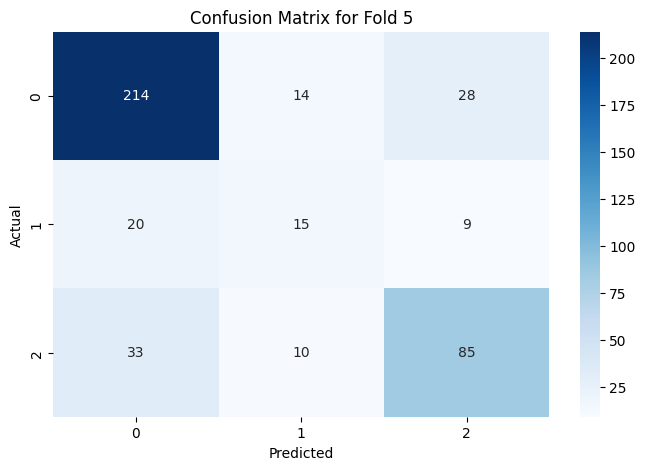

Fold 6:

Confusion Matrix:
 [[196  12  34]
 [ 27   6   5]
 [ 47   4  97]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.73      0.81      0.77       242
      netral       0.27      0.16      0.20        38
     positif       0.71      0.66      0.68       148

    accuracy                           0.70       428
   macro avg       0.57      0.54      0.55       428
weighted avg       0.68      0.70      0.69       428

Accuracy:  0.6985981308411215

----------------------



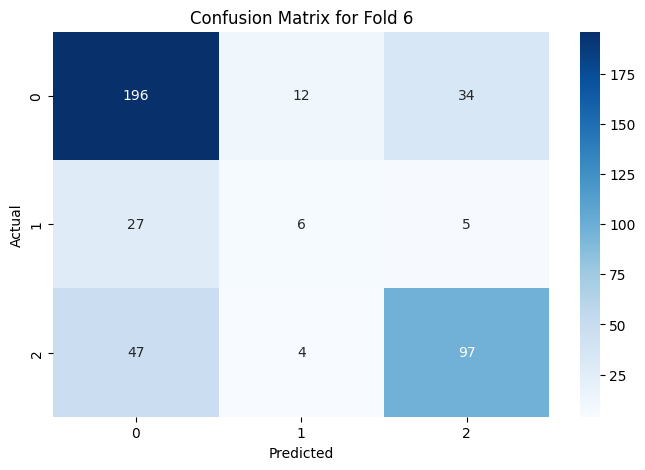

Fold 7:

Confusion Matrix:
 [[178  10  48]
 [ 18   5   9]
 [ 53   2 105]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.71      0.75      0.73       236
      netral       0.29      0.16      0.20        32
     positif       0.65      0.66      0.65       160

    accuracy                           0.67       428
   macro avg       0.55      0.52      0.53       428
weighted avg       0.66      0.67      0.66       428

Accuracy:  0.6728971962616822

----------------------



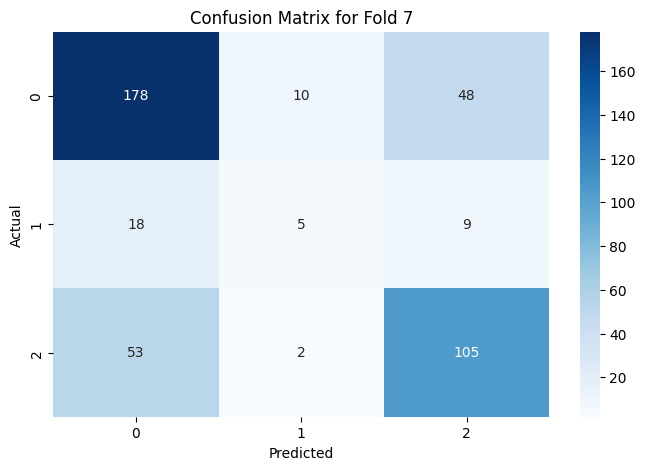

Fold 8:

Confusion Matrix:
 [[194   5  32]
 [ 31  18  10]
 [ 30   6 102]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.76      0.84      0.80       231
      netral       0.62      0.31      0.41        59
     positif       0.71      0.74      0.72       138

    accuracy                           0.73       428
   macro avg       0.70      0.63      0.64       428
weighted avg       0.72      0.73      0.72       428

Accuracy:  0.7336448598130841

----------------------



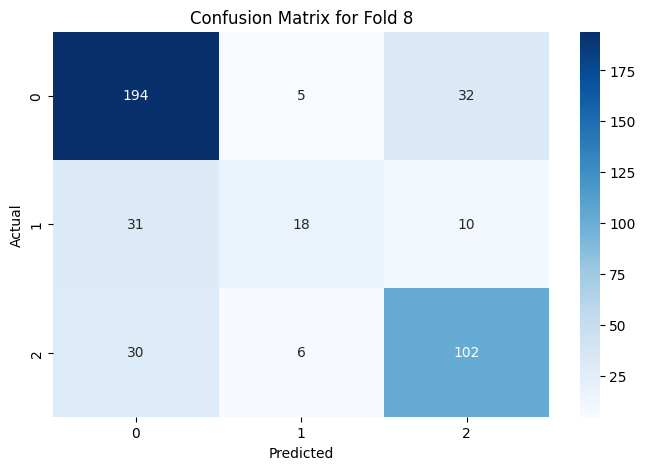

Fold 9:

Confusion Matrix:
 [[187  12  38]
 [ 21   8   9]
 [ 40   4 109]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.75      0.79      0.77       237
      netral       0.33      0.21      0.26        38
     positif       0.70      0.71      0.71       153

    accuracy                           0.71       428
   macro avg       0.60      0.57      0.58       428
weighted avg       0.70      0.71      0.70       428

Accuracy:  0.7102803738317757

----------------------



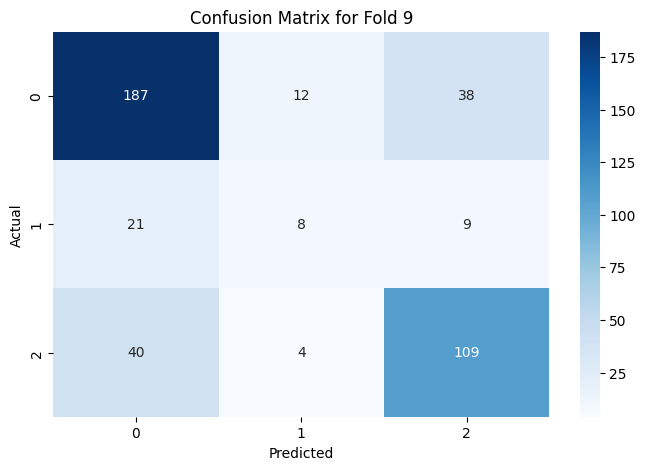

Fold 10:

Confusion Matrix:
 [[180  10  41]
 [ 21   9   8]
 [ 44   5 110]]

Classification Report:
               precision    recall  f1-score   support

     negatif       0.73      0.78      0.76       231
      netral       0.38      0.24      0.29        38
     positif       0.69      0.69      0.69       159

    accuracy                           0.70       428
   macro avg       0.60      0.57      0.58       428
weighted avg       0.69      0.70      0.69       428

Accuracy:  0.6985981308411215

----------------------



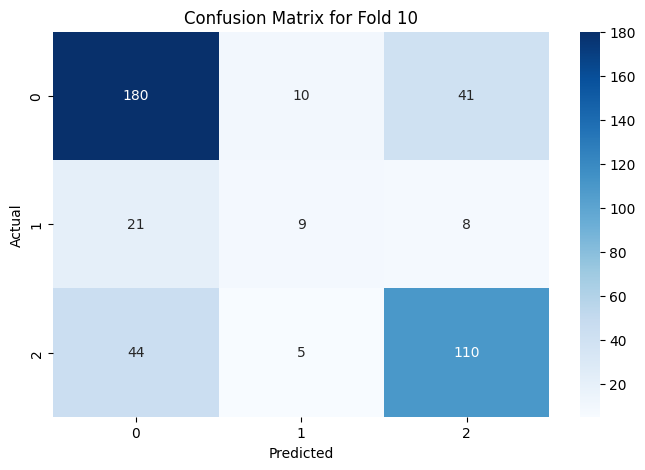

In [63]:
kFold = KFold(n_splits=10, random_state=42, shuffle=True)

for train_index, test_index in kFold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    precisions.append(precision_score(y_test, y_pred, average='macro'))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    accuracies.append(accuracy_score(y_test, y_pred))  
    
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    class_reports.append(classification_report(y_test, y_pred))

for i, (conf_matrix, class_report) in enumerate(zip(conf_matrices, class_reports)):
    print(f"Fold {i+1}:\n")
    print("Confusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)
    print("Accuracy: ", accuracies[i]) 
    print("\n----------------------\n")

    plt.figure(figsize=(8,5))
    sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Fold {i+1}')
    plt.show()

In [64]:
import numpy as np

In [65]:
# total_conf_matrix = np.zeros((2, 2))
total_conf_matrix = np.zeros((3, 3))

for conf_matrix in conf_matrices:
    total_conf_matrix += conf_matrix

avg_conf_matrix = total_conf_matrix / len(conf_matrices)

print("Rata-Rata Confusion Matrix:\n", avg_conf_matrix)

Rata-Rata Confusion Matrix:
 [[194.9  10.2  33.9]
 [ 23.8   9.7  10. ]
 [ 40.7   6.1  99.1]]


In [66]:
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1_score = np.mean(f1_scores)
avg_accuracy = np.mean(accuracies)

print("Rata-Rata Precision: ", avg_precision)
print("Rata-Rata Recall: ", avg_recall)
print("Rata-Rata F1-Score: ", avg_f1_score)
print("Rata-Rata Accuracy: ", avg_accuracy)

Rata-Rata Precision:  0.602528291025911
Rata-Rata Recall:  0.5715855342450659
Rata-Rata F1-Score:  0.5797503462316456
Rata-Rata Accuracy:  0.708915539289371
